# Information about dataset

This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

name

year

selling_price

km_driven

fuel

seller_type

transmission

Owner

For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset


# Libraries required

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import sequential_feature_selector
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15, 6]
import scipy.stats as stats

# Load the dataset and get the basic information about the dataset 

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
print(f"The number of rows in the dataset is {df.shape[0]} and the number of columns in the dataset is {df.shape[1]}")

The number of rows in the dataset is 8128 and the number of columns in the dataset is 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Observation:

1. mileage,engine,max_power,torque,seats are the variables which contain missing values.

2. We have 9 categorical variables and 4 numerical variables.

3. mileage,engine,max_power are currently categorical variables but they can be changed to numerical variables

## Changing variable type according to the data

In [6]:
df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")

In [7]:
df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")

In [8]:
df["max_power"] = df["max_power"].str.extract('([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

## Feature Engineering

We can get the age of the car as we have the data for the year in which the car was purchased.

In [9]:
import math
import datetime
df["age_of_car"] = (datetime.datetime.now().year) - (df["year"])

In [10]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

We have many different makes for each brand name. Since we have the details of engine and number of seats, we can extract the name of the brand from the variable 'name'.

In [11]:
df["car_brand"] = df["name"].str.extract('([^\s]+)')
df["car_brand"] = df["car_brand"].astype("object")

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age_of_car,car_brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,9,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,9,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,13,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16,Maruti


In [13]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [14]:
# Dropping variable 'torque' since we already have the engine data along with max_power and mileage.
# Dropping variable 'name' since we already extracted the car brand name.
df.drop(["name", "torque",'year'], axis = 1, inplace = True)

In [15]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age_of_car,car_brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,Maruti


## Description of dataset and check for null values

In [16]:
df.isnull().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
age_of_car         0
car_brand          0
dtype: int64

In [17]:
# Percentage of null values
(df.isnull().sum() / df.shape[0])*100

selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.657480
seats            2.718996
age_of_car       0.000000
car_brand        0.000000
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   max_power      7912 non-null   float64
 9   seats          7907 non-null   float64
 10  age_of_car     8128 non-null   int64  
 11  car_brand      8128 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7912.0,91.517919,35.822499,0.0,68.05,82.0,102.00,400.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0
age_of_car,8128.0,9.195989,4.044249,3.0,6.00,8.0,12.00,40.0


1. The oldest car in the dataset was manufactured in 1983, making it 39 years old. Conversely, the newest car was produced in 2020 and is only 2 years old.

2. The selling price of the cars ranges from a minimum of 29999 USD to a maximum of 10000000 USD. On average, the selling price is 638271 USD.

3. The cars in the dataset have a varied driving history. The least driven car has covered a distance of 1 km, while the most driven car has an impressive driving distance of 2360457 km. On average, the cars have traveled approximately 69819 km.

4. The car models in the dataset have a seating capacity that ranges from 2 seats to 14 seats.

5. The mileage of the cars in the dataset varies, with the minimum mileage recorded as 0 and the maximum as 42. On average, the cars have a mileage of 19.4.

6. The engine volumes of the cars range from 624 to 3604. On average, the engine volume is 1458.

In [20]:
df.describe(include = object).T

,count,unique,top,freq
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289
car_brand,8128,32,Maruti,2448


1. The car brand that appears most frequently in the dataset is Maruti, with a frequency of 2448 occurrences.

2. Among the different fuel types, Diesel is the most common, appearing with a frequency of 4402.

3. The seller type that occurs most frequently in the dataset is Individual, with a frequency of 6766.

4. Manual transmission is the most commonly found type among the cars, with a frequency of 7078.

5. Among the different owner types, First owner is the most frequent, appearing with a frequency of 5289.

<AxesSubplot: >

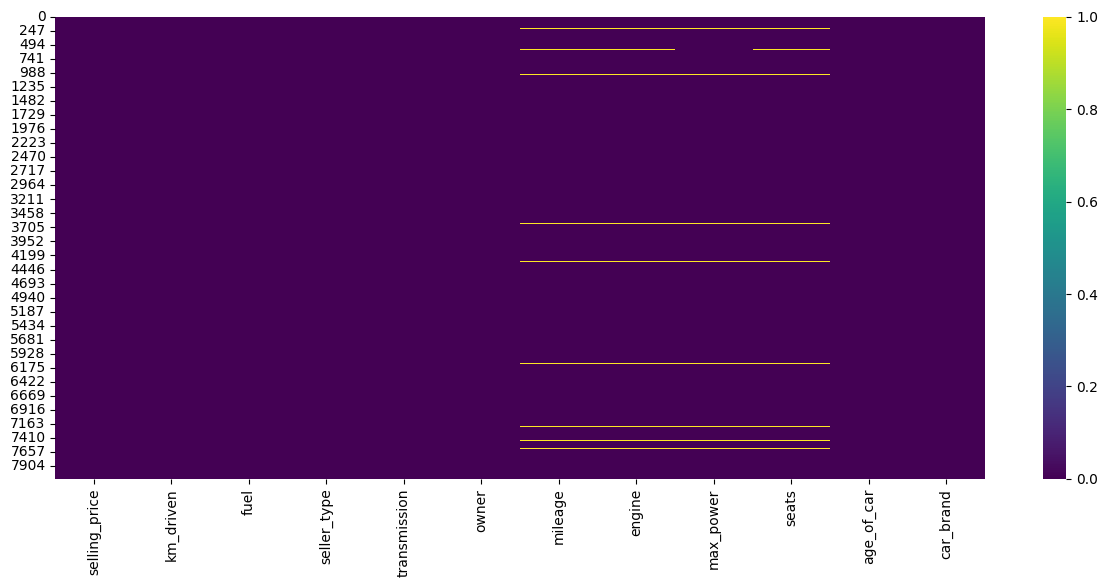

In [21]:
sns.heatmap(df.isna(),cmap='viridis')

## Filling the numerical missing values with its median and the missing categorical values with its frequent values

In [22]:
numerical = [column for column in df.select_dtypes(["int", "float"])]

for col in numerical:
    df[col].fillna(df[col].median(), inplace = True)

In [23]:
categorical = [column for column in df.select_dtypes(exclude = ["int", "float"])]

for col in categorical:
    df[col].fillna(df[col].value_counts().index[0], inplace = True)

<AxesSubplot: >

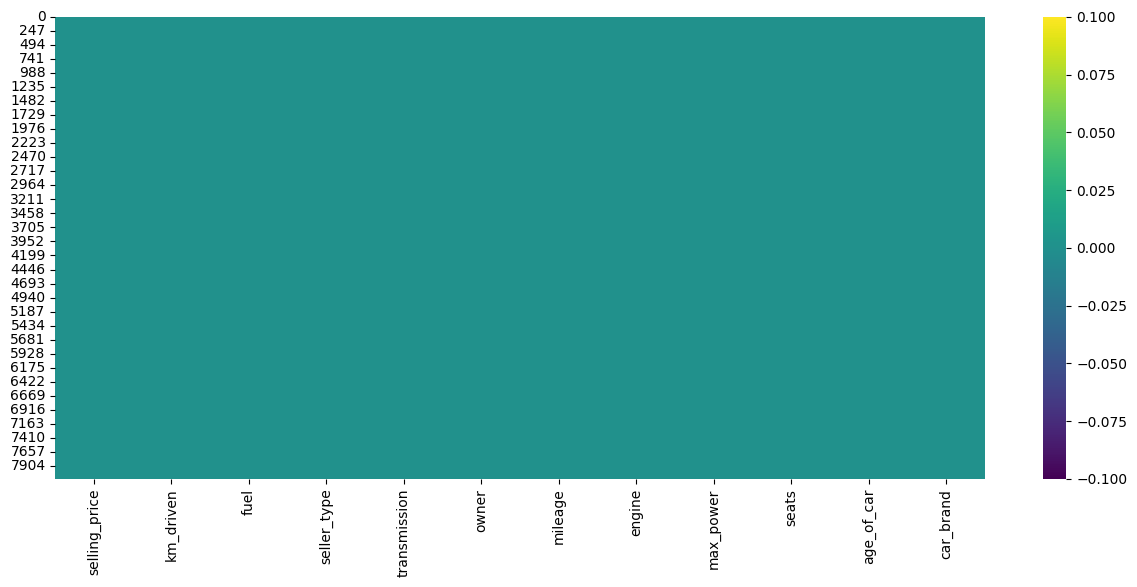

In [24]:
sns.heatmap(df.isna(),cmap='viridis')

In [25]:
df.isna().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
age_of_car       0
car_brand        0
dtype: int64

## Count of all the sub categories in our categorical variables

In [26]:
print("Class frequencies of 'transmission' variable: \n\n", df["transmission"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'seller_type' variable: \n\n", df["seller_type"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'owner' variable: \n\n", df["owner"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'car_brand_name' variable: \n\n", df["car_brand"].value_counts())

Class frequencies of 'transmission' variable: 

 Manual       7078
Automatic    1050
Name: transmission, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'seller_type' variable: 

 Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'owner' variable: 

 First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'car_brand_name' variable: 

 Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswa

<AxesSubplot: >

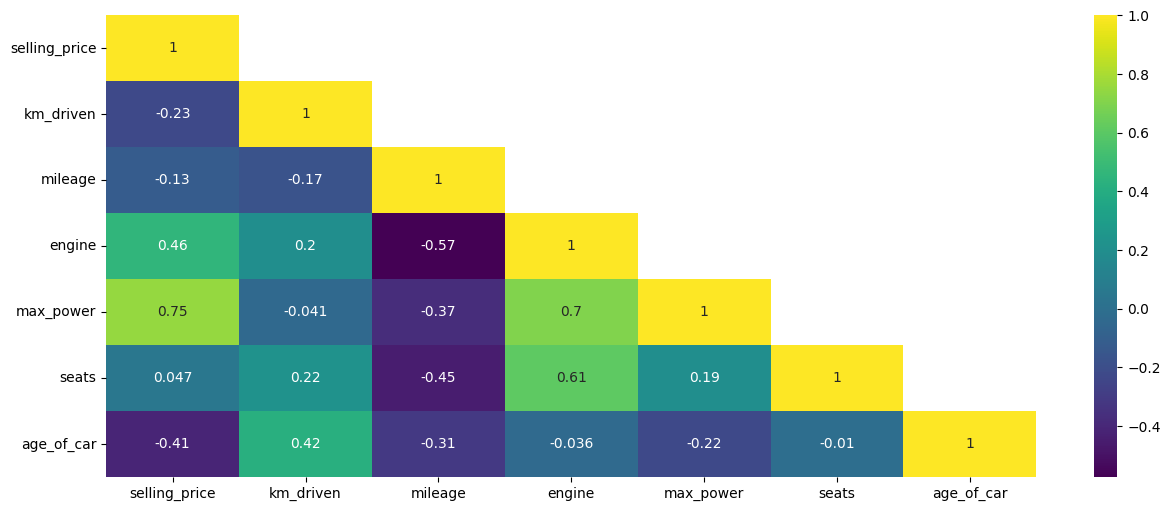

In [27]:
sns.heatmap(df.corr(),cmap='viridis',annot=True,mask=np.triu(df.corr(),1))

The analysis reveals significant correlations between certain variables:

1. There is a strong negative correlation of -0.57 between the 'mileage' and 'engine' variables.

2. The 'max_power' and 'engine' variables exhibit a strong positive correlation of 0.70.

3. There is a moderate positive correlation of 0.61 between the 'seats' and 'engine' variables.

4. The 'max_power' and 'selling_price' variables demonstrate a strong positive correlation of 0.74.

Additionally, there are moderate-level correlations observed between other variables in the dataset.

# EDA

In [28]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(exclude=np.number)

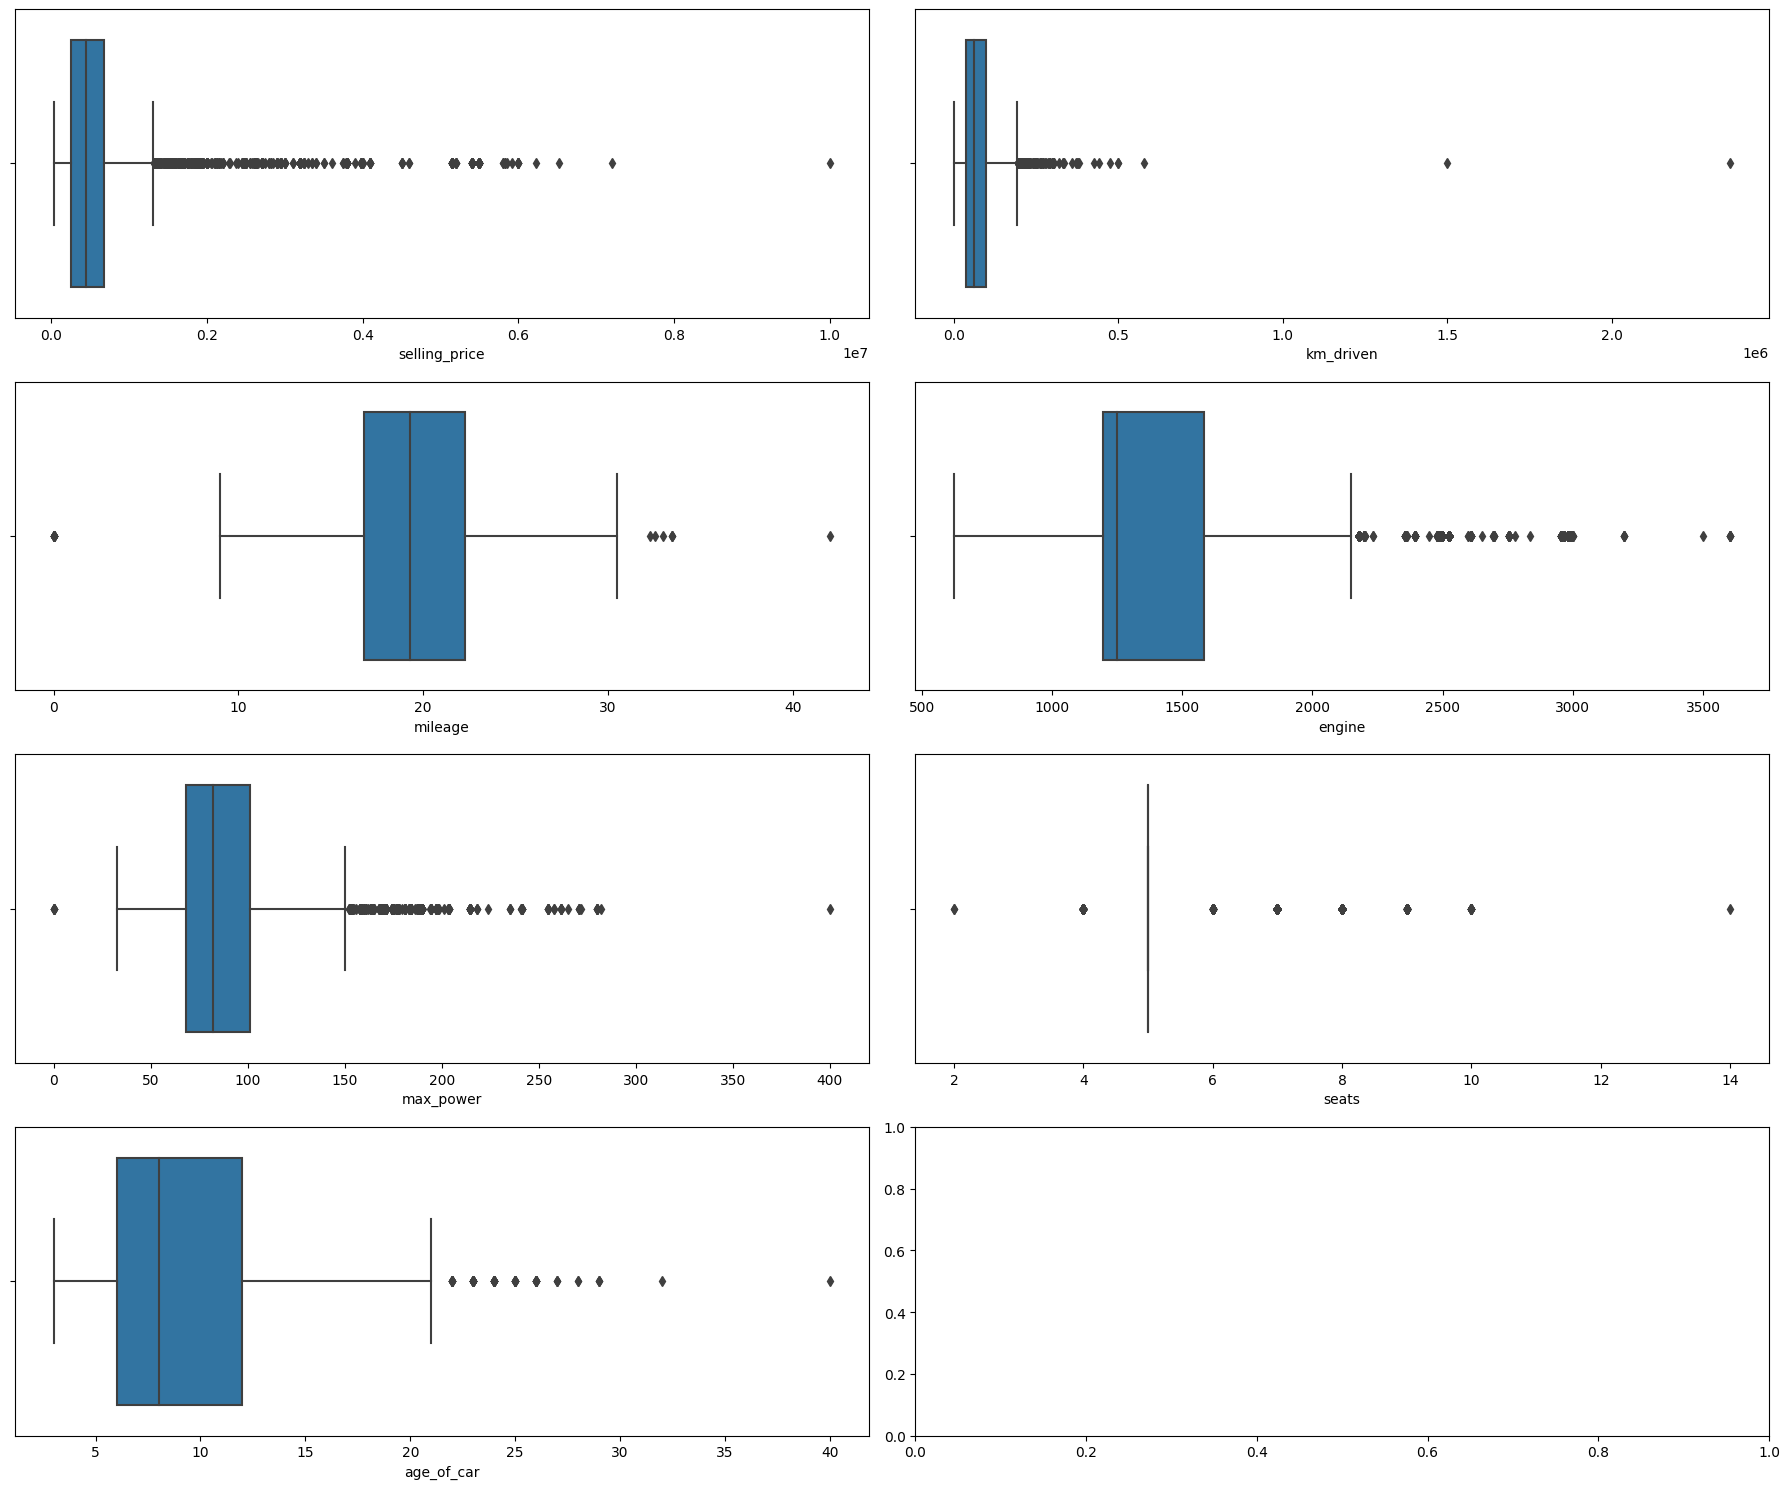

In [29]:
#Boxplots
plt.rcParams['figure.figsize'] = [18, 15]
fig, ax= plt.subplots(4,2)

for i, subplot in zip(num.columns, ax.flatten()):
    sns.boxplot(x=df[i], ax=subplot)

plt.tight_layout()
plt.show()

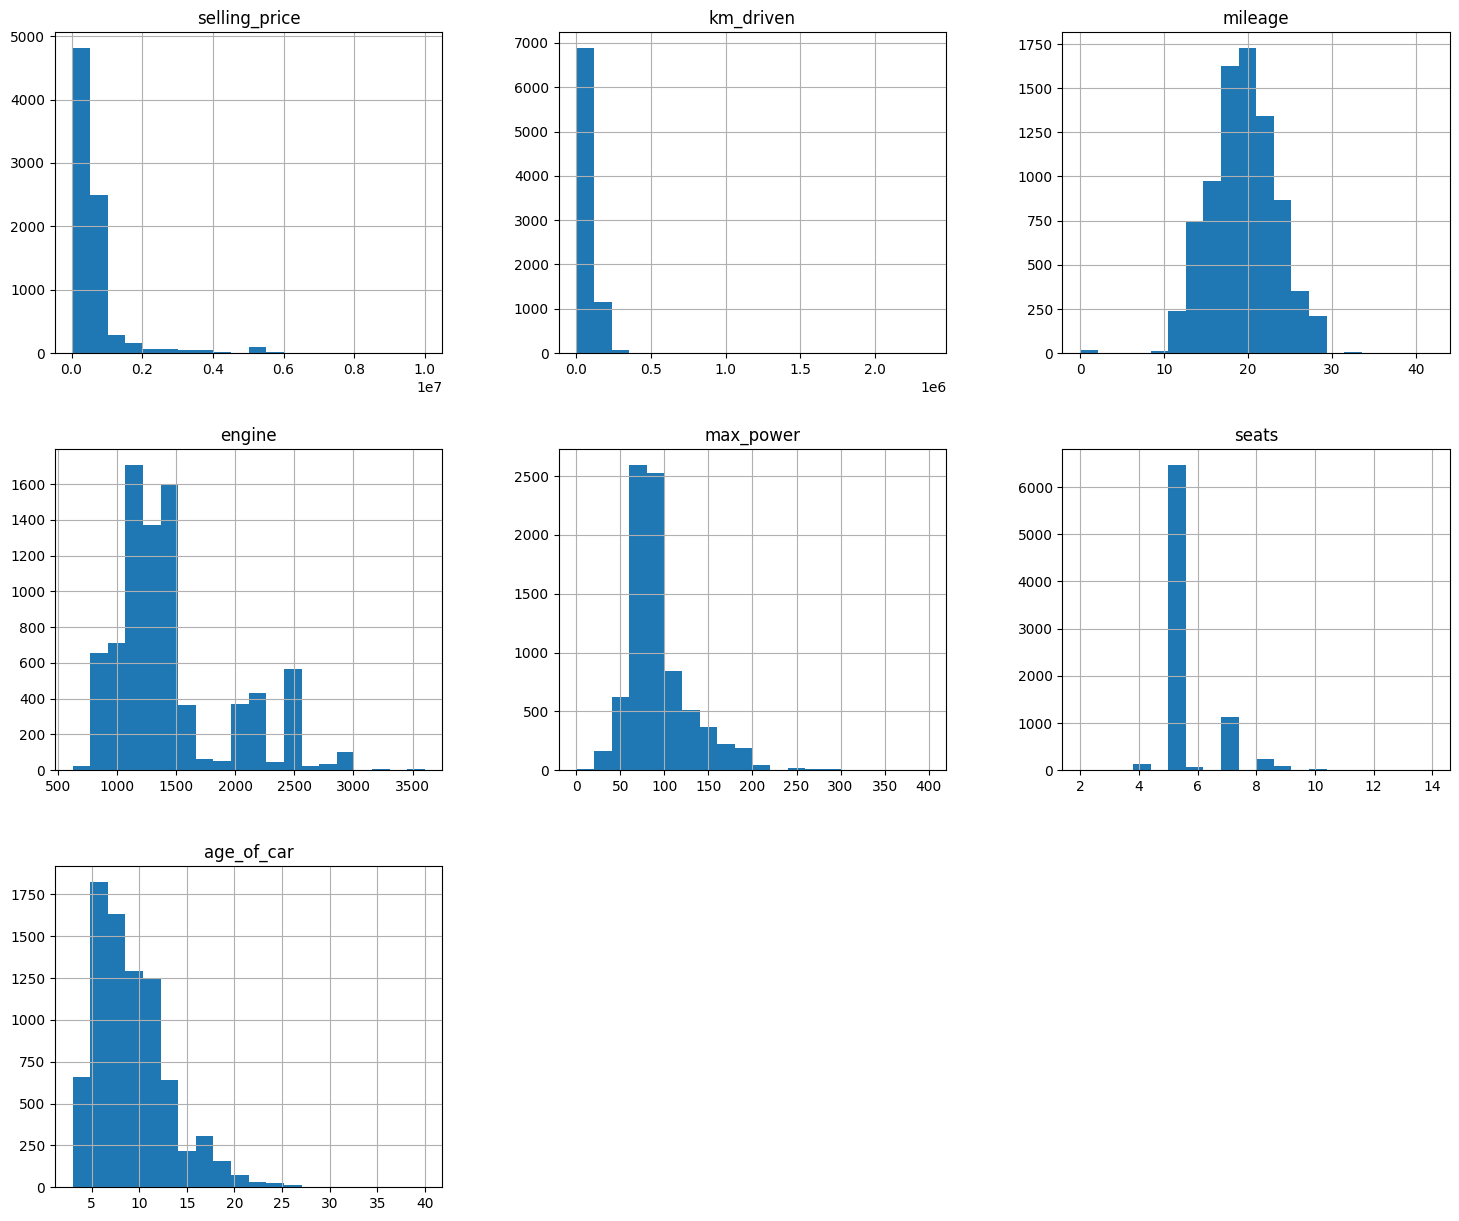

In [30]:
#Distribution
df.hist(bins=20)
plt.show()

In [31]:
catcols = ['fuel', 'seller_type', 'transmission', 'owner']

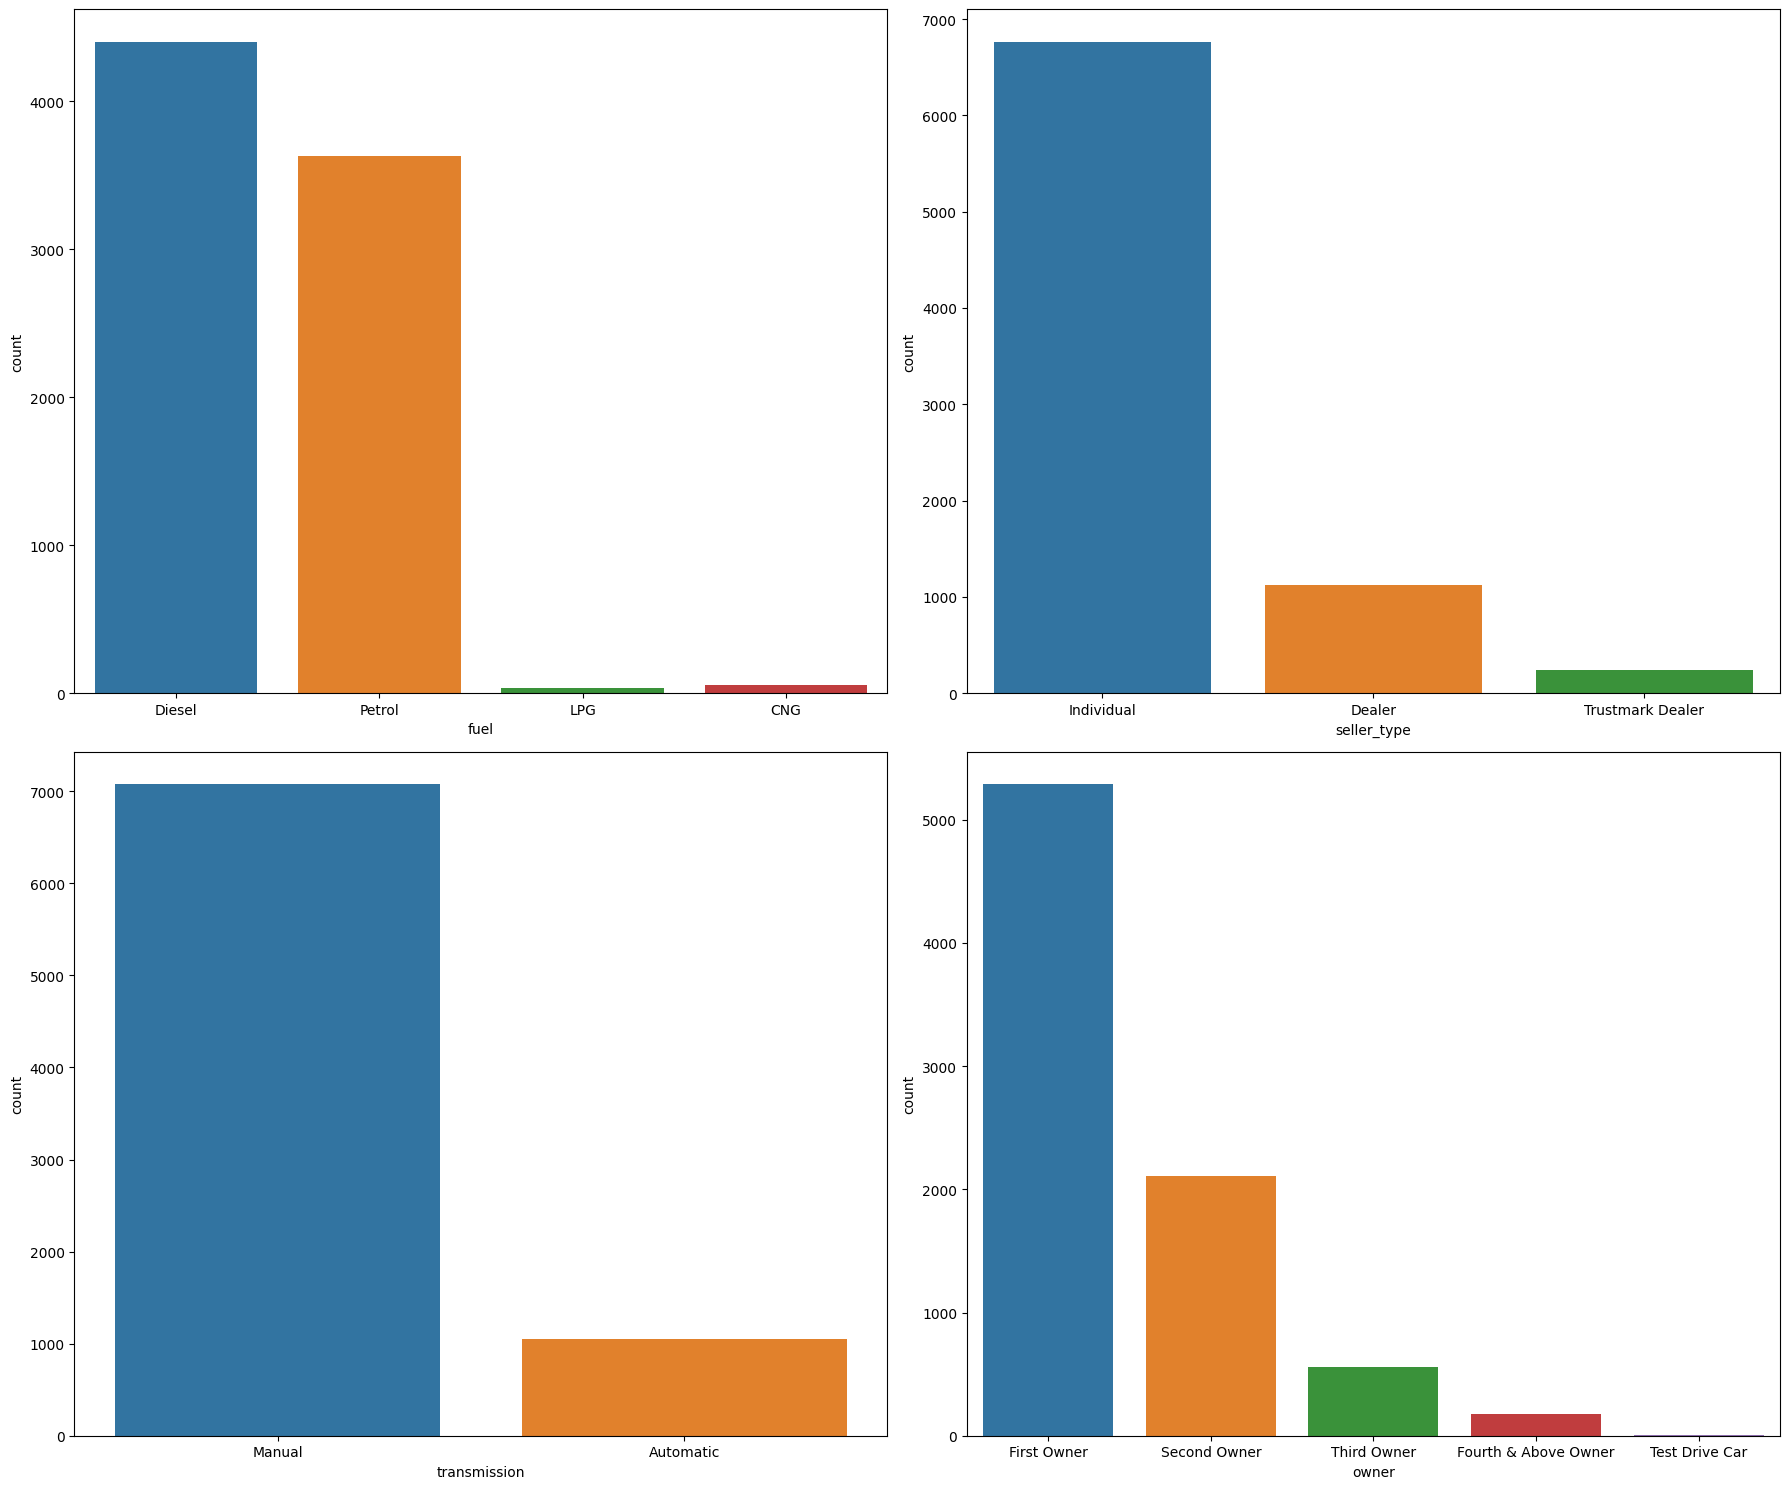

In [32]:
#Boxplots
plt.rcParams['figure.figsize'] = [18, 15]
fig, ax= plt.subplots(2,2)

for i, subplot in zip(catcols, ax.flatten()):
    sns.countplot(x=df[i], ax=subplot)

plt.tight_layout()
plt.show()

### Bi variate

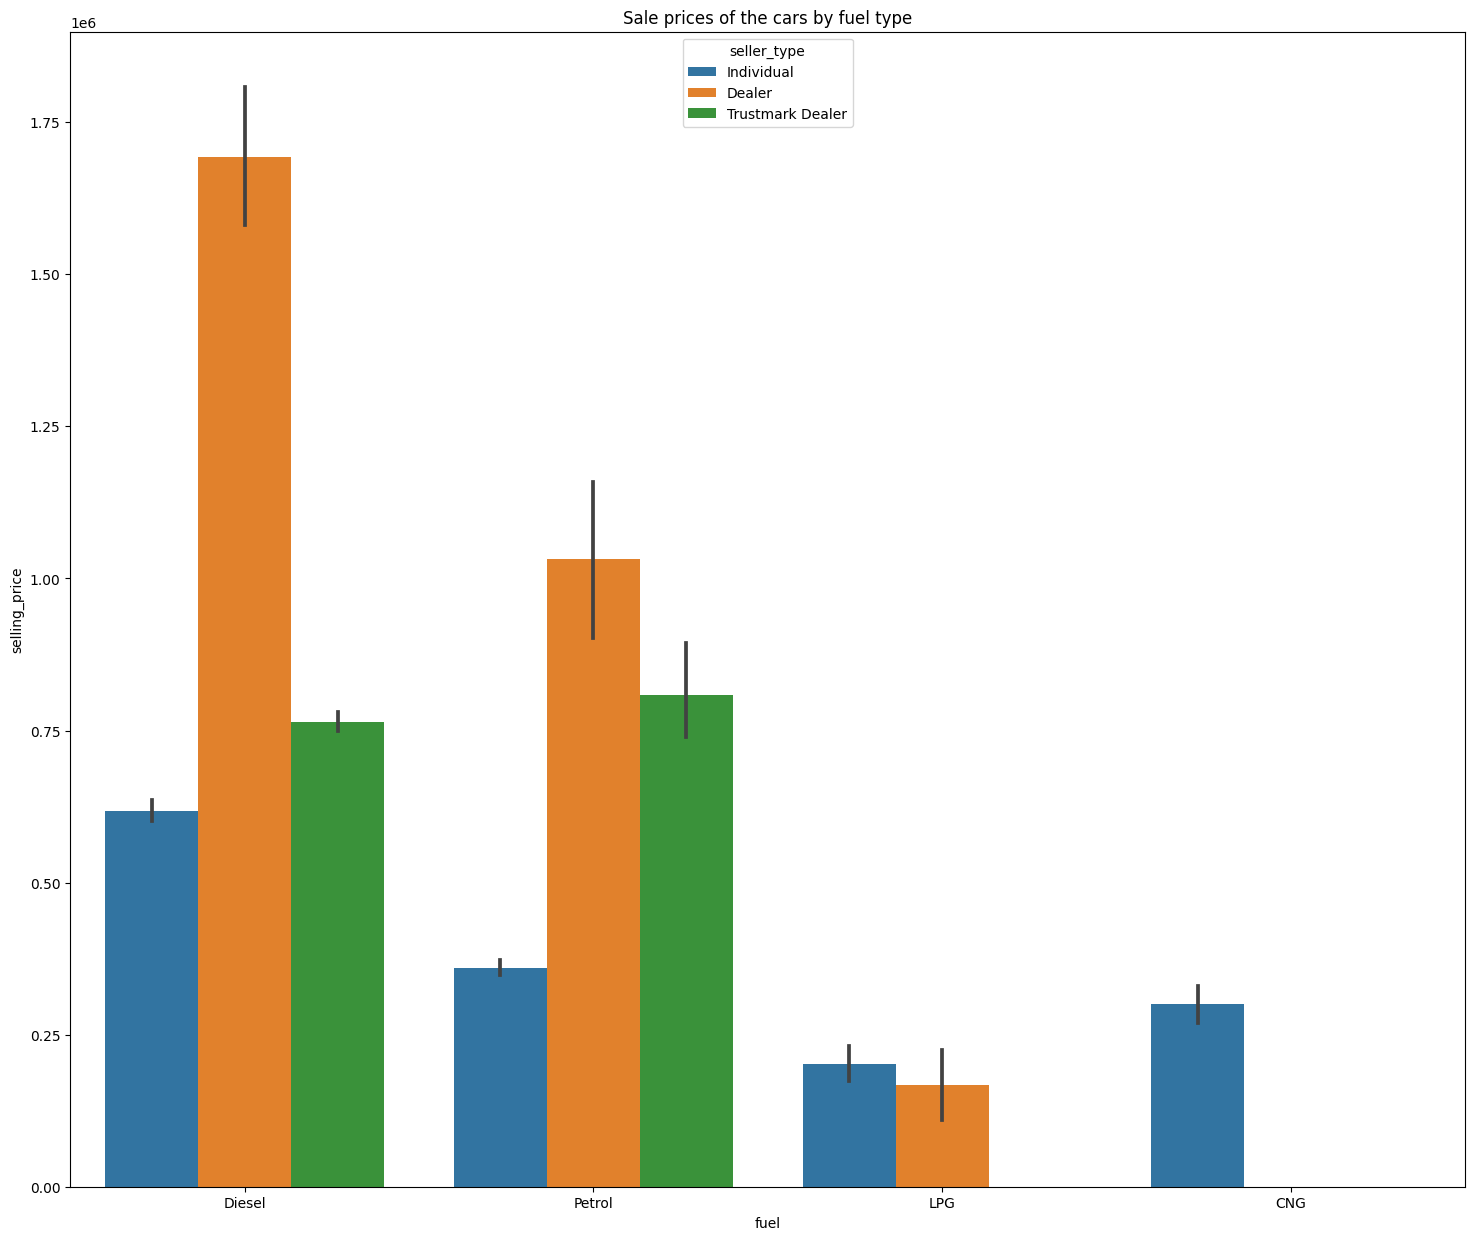

In [33]:
sns.barplot(x = "fuel",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

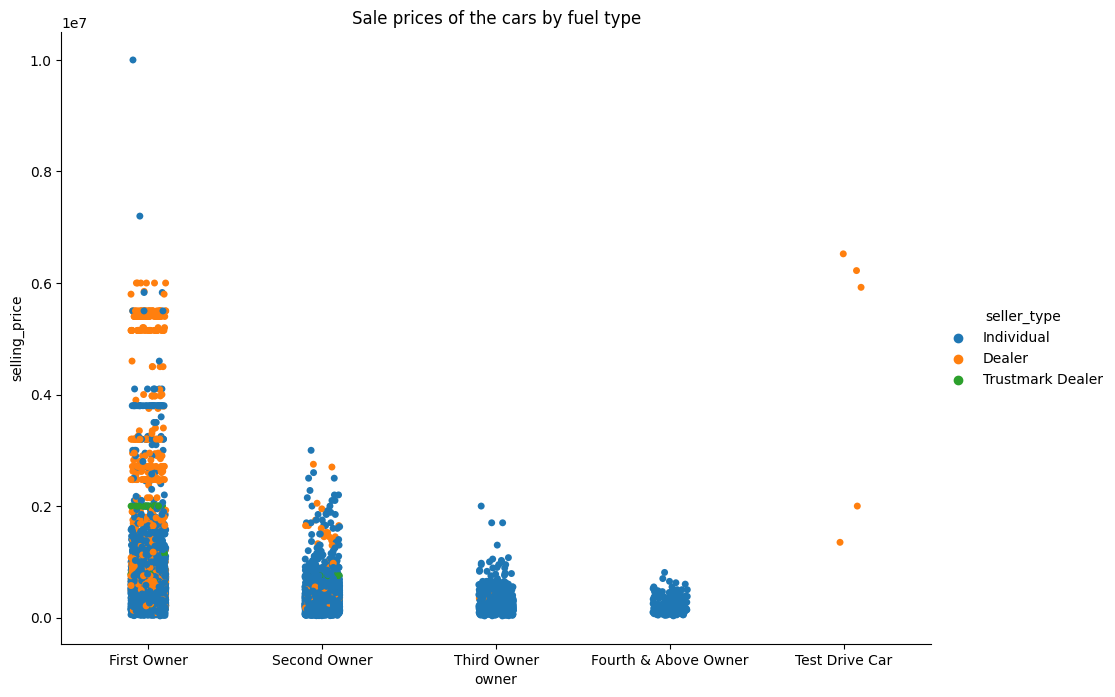

In [34]:
sns.catplot(x = "owner",
            y = "selling_price",
            height = 7,
            aspect = 1.37,
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

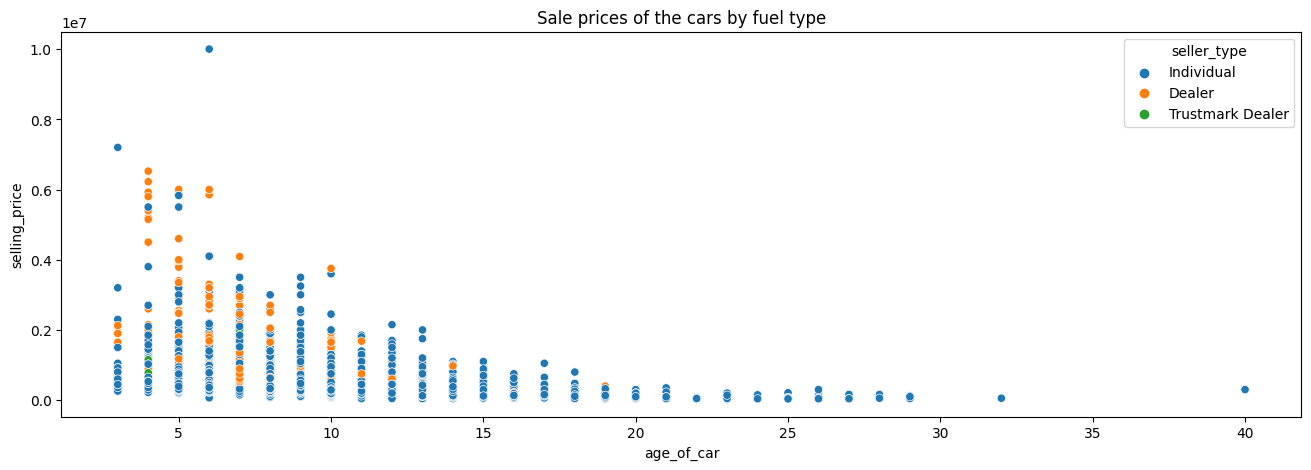

In [35]:
plt.rcParams['figure.figsize'] = [16, 5]
sns.scatterplot(x = "age_of_car",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

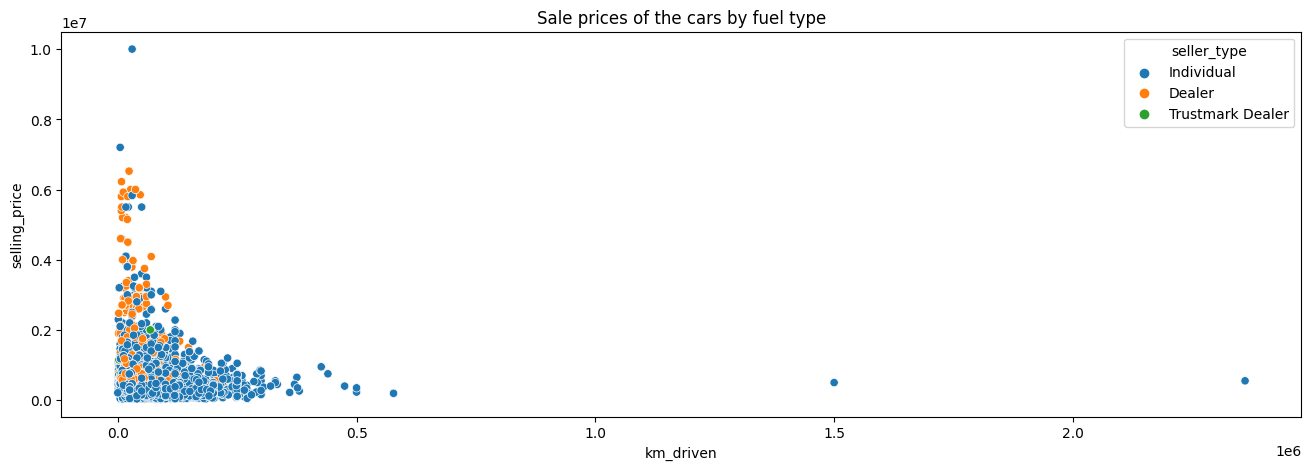

In [36]:
sns.scatterplot(x = "km_driven",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

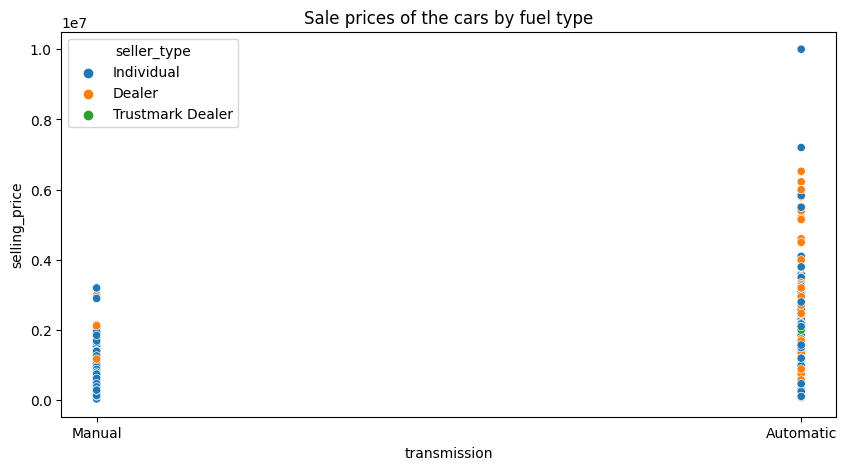

In [37]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.scatterplot(x = "transmission",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

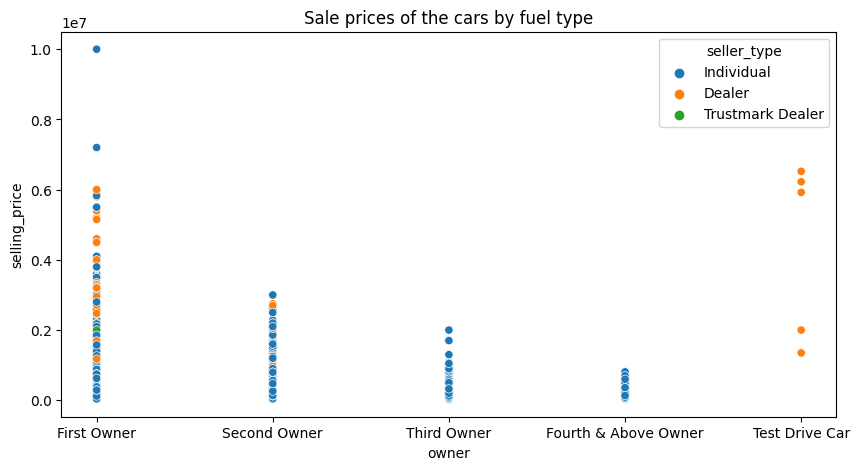

In [38]:
sns.scatterplot(x = "owner",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

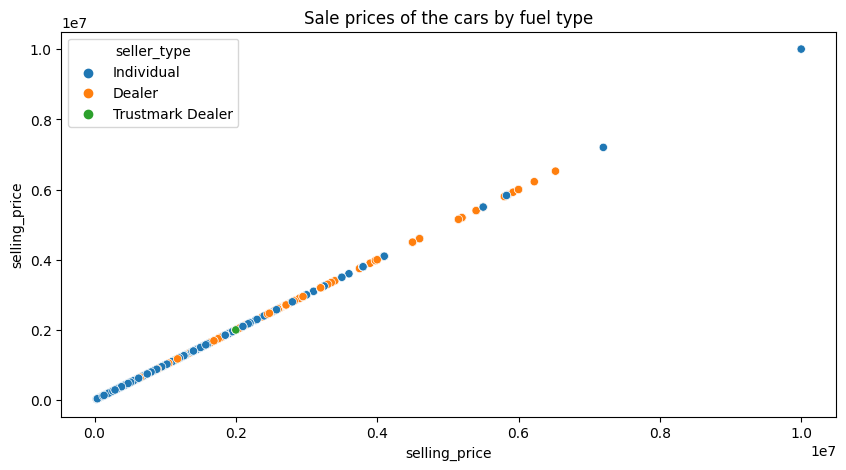

In [39]:
sns.scatterplot(x = "selling_price",
            y = "selling_price",
            hue = "seller_type",
            data = df).set(title = "Sale prices of the cars by fuel type");

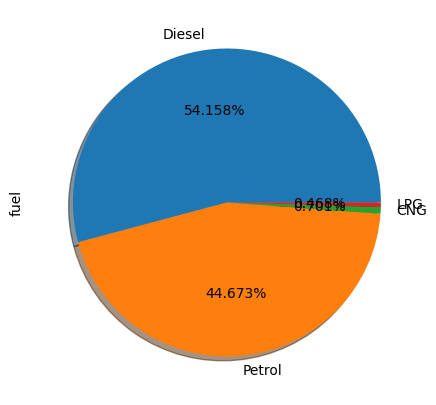

In [40]:
df["fuel"].value_counts().plot.pie(autopct='%1.3f%%', shadow = True)
plt.show()

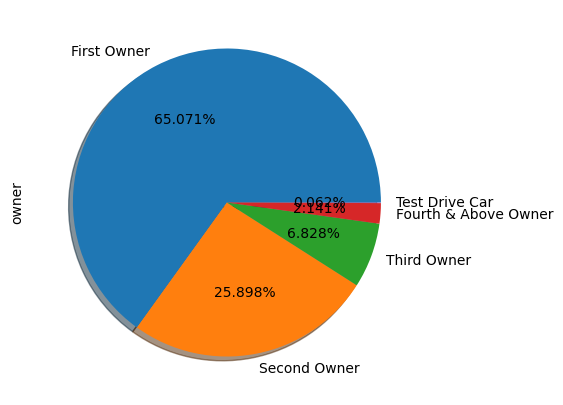

In [41]:
df["owner"].value_counts().plot.pie(autopct='%1.3f%%', shadow = True)
plt.show()

## Conclusions:
1. Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.

2. The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.

3. Automatic cars are more expensive than manual cars.

4. As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.

5. As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.

6. As the car ages, its Selling_Price decreases. So Selling_Price is inversely proportional to the Age of the car.

7. As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner.

8. There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least frequency.

9. There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.

10. There are 2 Transmission categories. Manual has the highest frequency and Automatic has the least frequency.

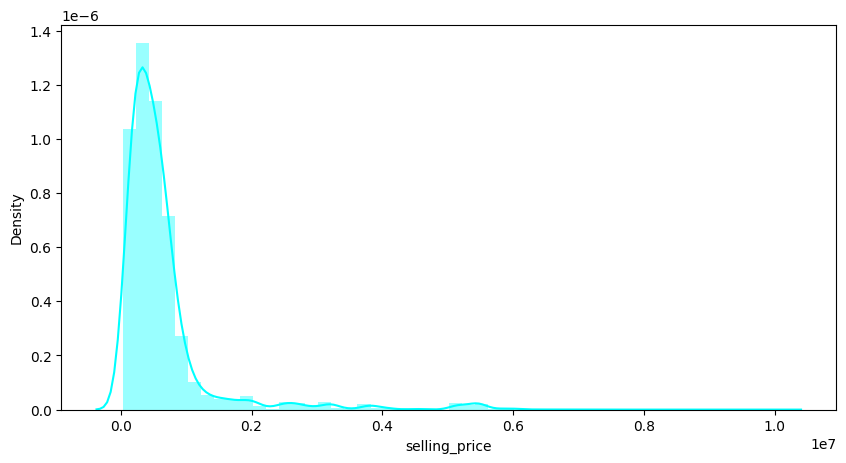

In [42]:
sns.distplot(df["selling_price"], color = "aqua");

In [43]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age_of_car,car_brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,Maruti


## Outlier Treatment

In [44]:
# outlier treatment using IQR method

#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1
#df[~((df>(q3+1.5*iqr))|(df<(q1-1.5*iqr))).any)axis=1]

## Encoding

In [45]:
print(df.fuel.value_counts())
print('\n')
print(df.seller_type.value_counts())
print('\n')
print(df.transmission.value_counts())
print('\n')
print(df.owner.value_counts())
print('\n')
print(df.car_brand.value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64


Manual       7078
Automatic    1050
Name: transmission, dtype: int64


First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia       

In [46]:
# encoding "fuel" Column
df.replace({'fuel':{'Petrol':3,'Diesel':1,'LPG':2,'CNG':0}},inplace=True)

# encoding "seller_type" Column
df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "transmission" Column
df.replace({'transmission':{'Manual':1,'Automatic':0}},inplace=True)

# encoding "owner" Column
df.replace({'owner':{'First Owner':0,'Fourth & Above Owner':1,'Second Owner':2,'Test Drive Car':3,'Third Owner':4}},inplace=True)

In [47]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age_of_car,car_brand
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,9,Maruti
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,9,Skoda
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,17,Honda
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,13,Hyundai
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,16,Maruti


In [48]:
brands=sorted(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'])

In [49]:
brands

['Ambassador',
 'Ashok',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [50]:
brand_encoding = {brand: index for index, brand in enumerate(brands)}

In [51]:
brand_encoding

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [52]:
# encoding "car_brand" Column
df.replace({'car_brand':{'Ambassador': 0,'Ashok': 1,'Audi': 2,'BMW': 3,'Chevrolet': 4,'Daewoo': 5,'Datsun': 6,'Fiat': 7,
                         'Force': 8,'Ford': 9,'Honda': 10,'Hyundai': 11,'Isuzu': 12,'Jaguar': 13,'Jeep': 14,'Kia': 15,
                         'Land': 16,'Lexus': 17,'MG': 18,'Mahindra': 19,'Maruti': 20,'Mercedes-Benz': 21,
                         'Mitsubishi': 22,'Nissan': 23,'Opel': 24,'Peugeot': 25,'Renault': 26,
                         'Skoda': 27,'Tata': 28,'Toyota': 29,'Volkswagen': 30,'Volvo': 31}},inplace=True)

In [53]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age_of_car,car_brand
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,9,20
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,9,27
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,17,10
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,13,11
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,16,20


In [54]:
# Check skewness
print(df['selling_price'].skew())
print(df['km_driven'].skew())
print(df['mileage'].skew())
print(df['engine'].skew())
print(df['max_power'].skew())
print(df['age_of_car'].skew())

4.193533440675855
11.170909783549087
-0.14220847114521287
1.1753055440141613
1.6595575154307947
1.072292893616034


In [55]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age_of_car,car_brand
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,9,20
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,9,27
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,17,10
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,13,11
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,16,20


# Build a base model

### Determine the target and feature variables

In [56]:
x = df.drop('selling_price',axis=1)
y=df['selling_price']

### Train Test Split in the ratio 70:30

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                    test_size = 0.30,
                                                    random_state = 10)

In [58]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(5689, 11)
(5689,)
(2439, 11)
(2439,)


In [59]:
pt=PowerTransformer()
xtrain = pd.DataFrame(pt.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(pt.fit_transform(xtest),columns=xtest.columns)

I use Power Transformer here as it reduces the skewness of the data but also standardizes the values.By this there will be no data leakage.

## Base Model

In [61]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [62]:
ytrain=ytrain.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)
xtrain=xtrain.reset_index(drop=True)
xtest=xtest.reset_index(drop=True)

In [63]:
base_model = sm.OLS(ytrain,xtrain).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     901.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:30:15   Log-Likelihood:                -82370.
No. Observations:                5689   AIC:                         1.648e+05
Df Residuals:                    5677   BIC:                         1.648e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.278e+05   6233.699    100.707      0.000    6.16e+05     6.4e+05
km_driven    -9.037e+04   8930.678    -10.119      0.000   -1.08e+05   -7.29e+04
fuel         -1.186e+05   9228.178    -12.847      0.000   -1.37e+05      -1e+05
seller_type  -8.288e+04   6533.258    -12.686      0.000   -9.57e+04   -7.01e+04
transmission -2.057e+05   7686.248    -26.766      0.000   -2.21e+05   -1.91e+05
owner        -8696.8724   7255.183     -1.199      0.231   -2.29e+04    5526.058
mileage      -6.827e+04   9733.969     -7.013      0.000   -8.73e+04   -4.92e+04
engine       -2921.7085   1.43e+04     -0.204      0.838    -3.1e+04    2.51e+04
max_power     3.106e+05   1.11e+04     28.005      0.000    2.89e+05    3.32e+05
seats        -5.661e+04   8171.020     -6.929      0.000   -7.26e+04   -4.06e+04
age_of_car   -1.782e+05   9768.007    -18.239      0.000   -1.97e+05   -1.59e+05
car_brand    -2.339e+04   6455.382     -3.624      0.000    -3.6e+04   -1.07e+04
==============================================================================
Omnibus:                     3482.359   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59484.312
Skew:                           2.622   Prob(JB):                         0.00
Kurtosis:                      17.948   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Machine Learning Models

In [94]:
pf_df= pd.DataFrame(columns=['Model Name','R2_score_train','R2_score_test','RMSE_train',
                                      'RMSE_test','MAPE_TRAIN','MAPE_TEST'])



def model_build (model,name):
    global pf_df
    pred_train=model.predict(xtrain)
    pred_test=model.predict(xtest)
    
    r2_train=r2_score(ytrain,pred_train)
    r2_test=r2_score(ytest,pred_test)
    rmsetrain=np.sqrt(mean_squared_error(ytrain,pred_train))
    rmsetest=np.sqrt(mean_squared_error(ytest,pred_test))
    mape_train=mean_absolute_percentage_error(ytrain,pred_train)
    mape_test=mean_absolute_percentage_error(ytest,pred_test)
    
    
    new=pd.DataFrame([[name,r2_train,
                      r2_test,rmsetrain,
                      rmsetest,mape_train,
                      mape_test]],columns=['Model Name','R2_score_train',
                      'R2_score_test','RMSE_train',
                      'RMSE_test','MAPE_TRAIN',
                      'MAPE_TEST'])
    
    
    
    pf_df=pf_df.append(new,ignore_index=True)
    
    
    
    return new

### VIF

In [95]:
vif = pd.DataFrame()
vif["Features"] = xtrain.columns
vif["VIF"] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
print(vif)

        Features       VIF
0          const  1.000000
1      km_driven  2.052472
2           fuel  2.191494
3    seller_type  1.098419
4   transmission  1.520327
5          owner  1.354581
6        mileage  2.438306
7         engine  5.273922
8      max_power  3.164537
9          seats  1.718149
10    age_of_car  2.455389
11     car_brand  1.072389


### Linear Regression 

In [96]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)

model_build(lr_model,'Logistic Regression')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Logistic Regression,0.635849,0.580238,469683.468896,561882.79349,0.781974,0.843773


### Random Forest Regressor

In [97]:
rf=RandomForestRegressor()
rf_model = rf.fit(xtrain,ytrain)

model_build(rf_model,'Random Forest Regressor')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Random Forest Regressor,0.995471,0.720269,52380.338316,458684.809802,0.061518,0.196286


### Decision Tree Regressor

In [98]:
dt=DecisionTreeRegressor()
dt_model = dt.fit(xtrain,ytrain)

model_build(dt_model,'Decision Tree Regressor')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Decision Tree Regressor,0.99967,0.562268,14145.123433,573783.627084,0.007627,0.250943


### Ada Boost Regressor

In [99]:
abr=AdaBoostRegressor()
abr_model = abr.fit(xtrain,ytrain)

model_build(abr_model,'Ada Boost Regressor')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Ada Boost Regressor,0.822561,0.674743,327860.333365,494604.069747,1.116356,1.094285


### Gradient Boost Regressor

In [100]:
gbr=GradientBoostingRegressor()
gbr_model = gbr.fit(xtrain,ytrain)

model_build(gbr_model,'Gradient Boost Regressor')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Gradient Boost Regressor,0.976186,0.782083,120111.105044,404846.03318,0.187221,0.214914


### XG Boost Regressor

In [101]:
xgbr=XGBRegressor()
xgbr_model = dt.fit(xtrain,ytrain)

model_build(xgbr_model,'XG Boost Regressor')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,XG Boost Regressor,0.99967,0.567663,14145.123433,570237.007623,0.007627,0.249608


### Regularization Models

In [102]:
# lets go ahead with default parameters
ridge = Ridge()
lasso =Lasso()
enet =ElasticNet()

In [103]:
params = [{'alpha':[0.5,0.1,1,5,10]}]
gsv = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_root_mean_squared_error',cv=10)
model_gsv = gsv.fit(xtrain,ytrain)

model_build(model_gsv,'Grid search CV with lasso estimator')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Grid search CV with lasso estimator,0.635849,0.580243,469683.472218,561879.413215,0.781959,0.843757


In [104]:
params = [{'alpha':[0.5,0.1,1,5,10]}]
gsv1 = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_root_mean_squared_error',cv=10)
model_gsv1 = gsv1.fit(xtrain,ytrain)

model_build(model_gsv1,'Grid search CV with ridge estimator')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Grid search CV with ridge estimator,0.635847,0.58028,469684.676665,561854.903901,0.781214,0.842736


### Grid Search CV with Random Forest as estimator

In [105]:
param_grid = {
    'n_estimators': [100,150,200,300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 9],
    'max_leaf_nodes': [11,15]# Minimum number of samples required to be at a leaf node
}


rf_regressor = RandomForestRegressor(random_state=10)


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')


grid_search.fit(xtrain,ytrain)


best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)
print("Best Score (R-squared):", best_score)


Best Parameters: {'max_depth': None, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (R-squared): 0.9212642271925408


In [106]:
rf1=RandomForestRegressor(max_depth=None, max_leaf_nodes=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200)
rf_model_prune = rf1.fit(xtrain,ytrain)

model_build(rf_model_prune,'Random Forest Regressor with hyper parameter tuning')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Random Forest Regressor with hyper parameter t...,0.934676,0.707313,198929.716674,469187.213495,0.389102,0.405149


### Grid Search CV with Gradient Boost as estimator

In [107]:
'''param_grid = {
    'n_estimators': [150,200],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2,0.5],  # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

gb_regressor = GradientBoostingRegressor(random_state=10)


grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2')


grid_search.fit(xtrain, ytrain)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score (R-squared):", best_score)'''

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (R-squared): 0.9708866355352281


In [109]:
gbr1=GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150)
gbr1_model_prune = gbr1.fit(xtrain,ytrain)

model_build(gbr1_model_prune,'Gradient Boost Regressor with hyper parameter tuning')

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Gradient Boost Regressor with hyper parameter ...,0.993706,0.783565,61748.683373,403467.101494,0.117515,0.201215


In [110]:
pf_df

,Model Name,R2_score_train,R2_score_test,RMSE_train,RMSE_test,MAPE_TRAIN,MAPE_TEST
0,Logistic Regression,0.635849,0.580238,469683.468896,561882.793490,0.781974,0.843773
1,Random Forest Regressor,0.995471,0.720269,52380.338316,458684.809802,0.061518,0.196286
2,Decision Tree Regressor,0.999670,0.562268,14145.123433,573783.627084,0.007627,0.250943
3,Ada Boost Regressor,0.822561,0.674743,327860.333365,494604.069747,1.116356,1.094285
4,Gradient Boost Regressor,0.976186,0.782083,120111.105044,404846.033180,0.187221,0.214914
5,XG Boost Regressor,0.999670,0.567663,14145.123433,570237.007623,0.007627,0.249608
6,Grid search CV with lasso estimator,0.635849,0.580243,469683.472218,561879.413215,0.781959,0.843757
7,Grid search CV with ridge estimator,0.635847,0.580280,469684.676665,561854.903901,0.781214,0.842736
8,Random Forest Regressor with hyper parameter t...,0.934676,0.707313,198929.716674,469187.213495,0.389102,0.405149
9,Gradient Boost Regressor with hyper parameter ...,0.994942,0.734804,55353.730869,446609.449358,0.106658,0.208501


### Important Features

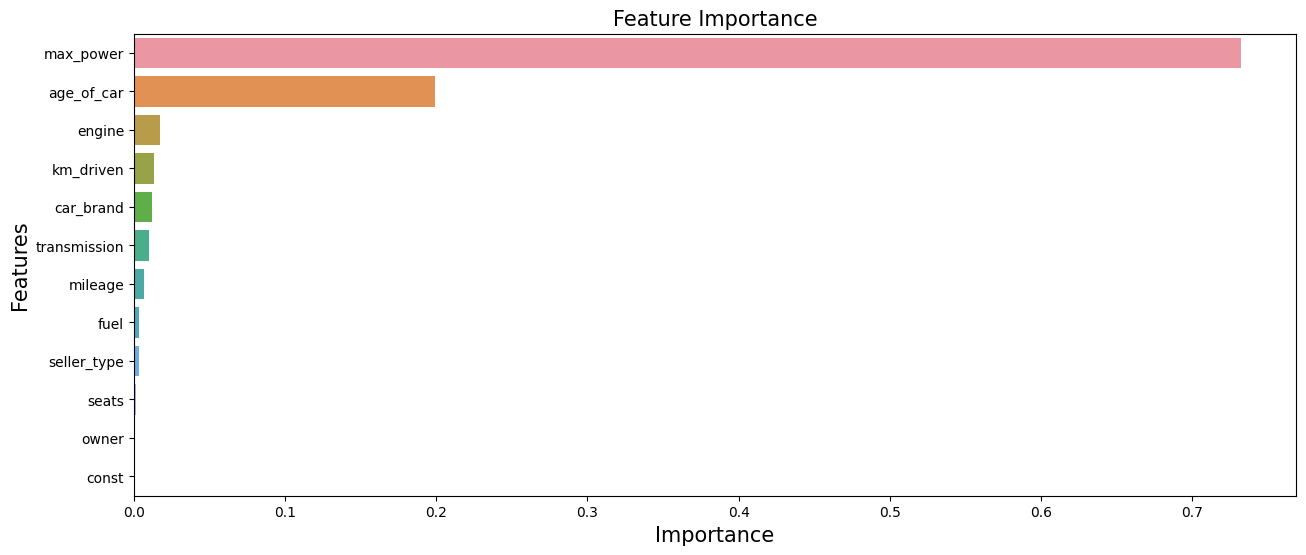

In [111]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': gbr_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()